In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# https://archive.ics.uci.edu/dataset/186/wine+quality
wine_red = pd.read_excel('C:\workspace\머신러닝\data\wine_red.xlsx')
wine_white = pd.read_excel('C:\workspace\머신러닝\data\wine_white.xlsx')

In [8]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
wine_red['label'] = 'red'
wine_white['label'] = 'white'

In [4]:
wine = pd.concat([wine_red,wine_white])

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  label                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [15]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'label'],
      dtype='object')

In [11]:
y = wine['label']
X = wine.drop('label',axis=1)

In [12]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
train_input, test_input, train_target, test_target = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
print(train_input.shape,test_input.shape)

(5197, 11) (1300, 11)


### 스케일링

In [8]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### Decision Tree 사용하여 분석

In [13]:
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled,test_target))

0.9996151625938041
0.98


In [58]:
pred_target = dt.predict(test_scaled)
accuracy_score(pred_target, test_target)

0.9846153846153847

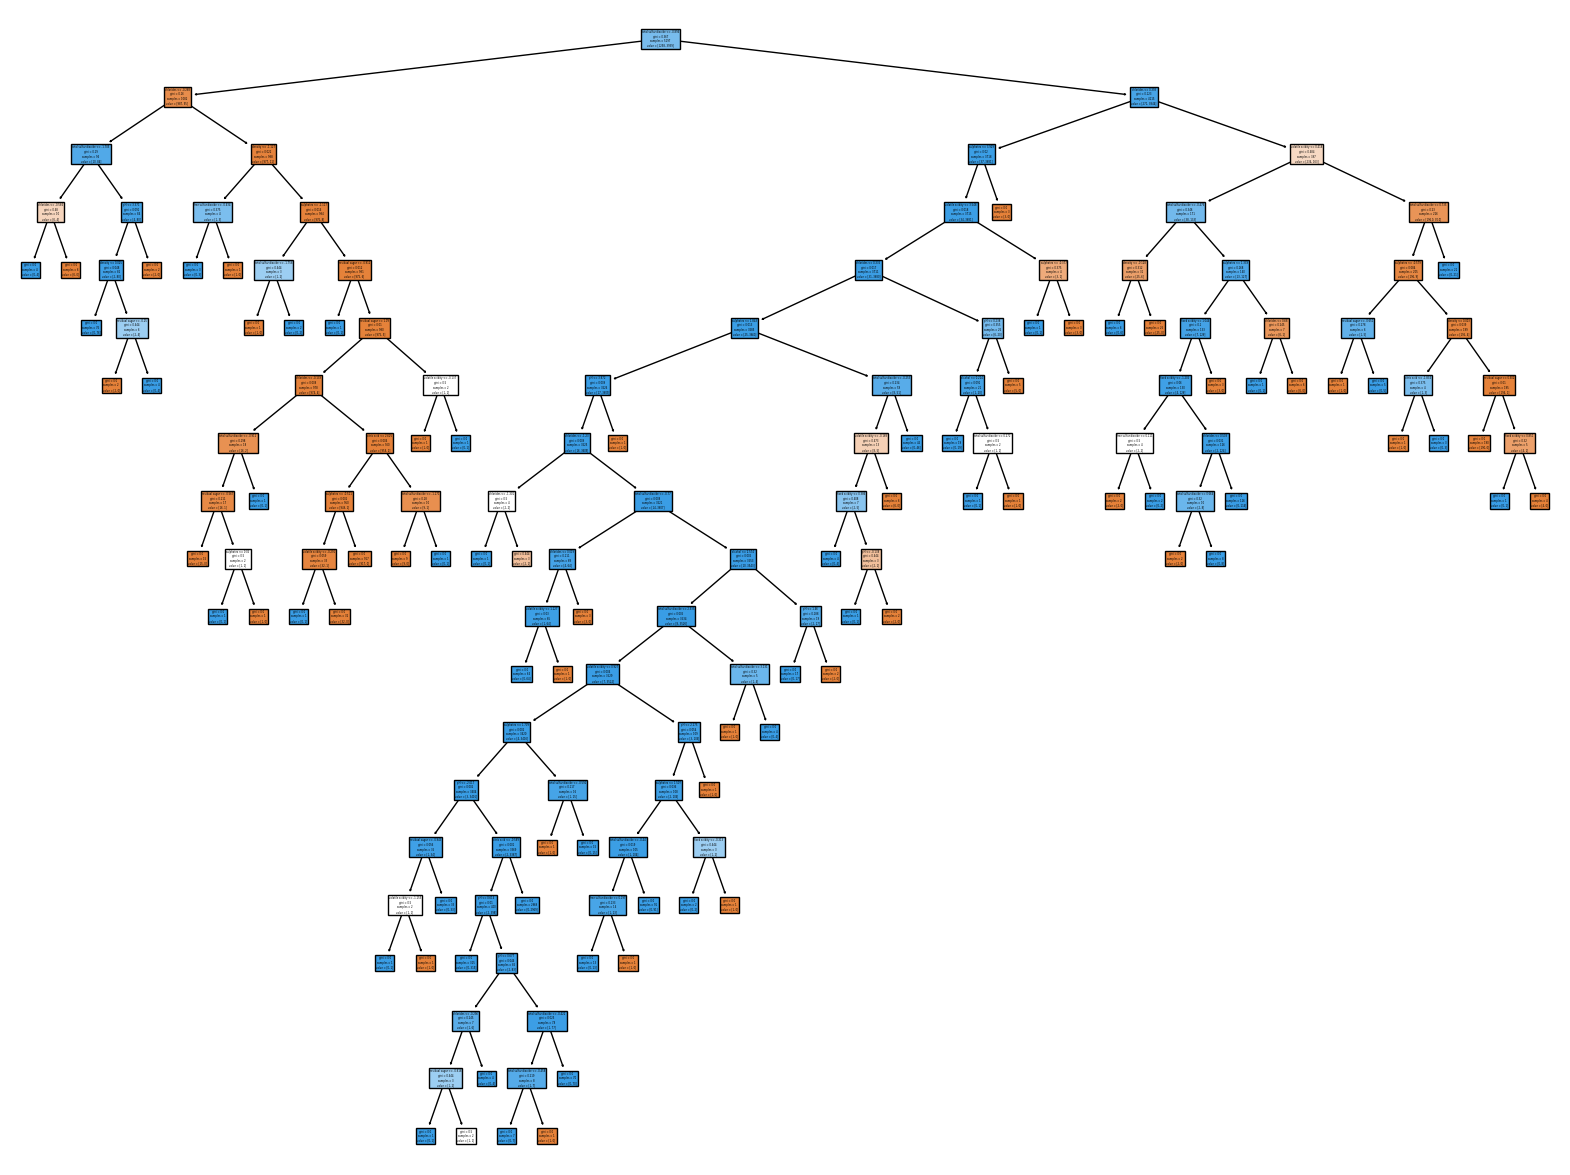

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names = X.columns)
plt.show()

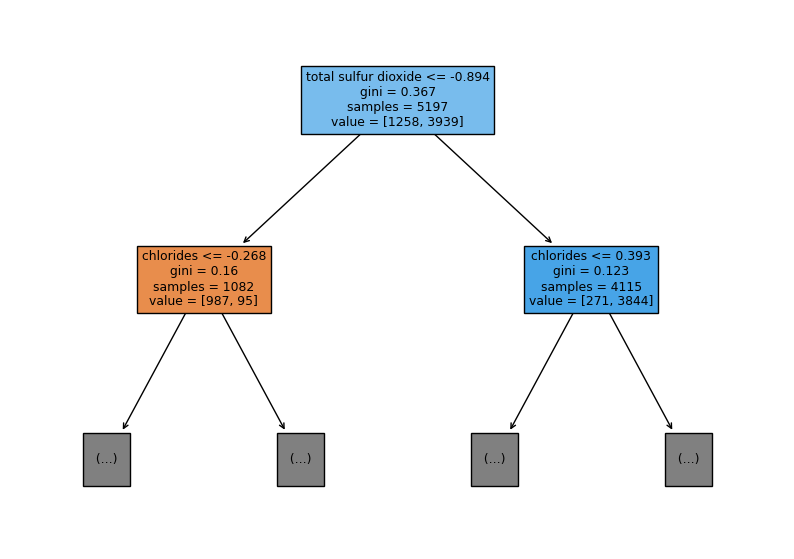

In [16]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names = X.columns)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

params = {'max_depth': range(1, 10),
          'min_samples_leaf': range(5,21)}
grid_dt = GridSearchCV(dt, 
                       param_grid=params, 
                       cv=5, 
                       n_jobs = -1)

grid_dt.fit(train_scaled, train_target)

print('params', grid_dt.best_params_)

params {'max_depth': 7, 'min_samples_leaf': 6}


In [20]:
final_dt = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'], min_samples_leaf = grid_dt.best_params_['min_samples_leaf'])

final_dt.fit(train_scaled, train_target)

print('Train', final_dt.score(train_scaled, train_target))
print('test', final_dt.score(test_scaled,test_target))

Train 0.9896093900327112
test 0.98


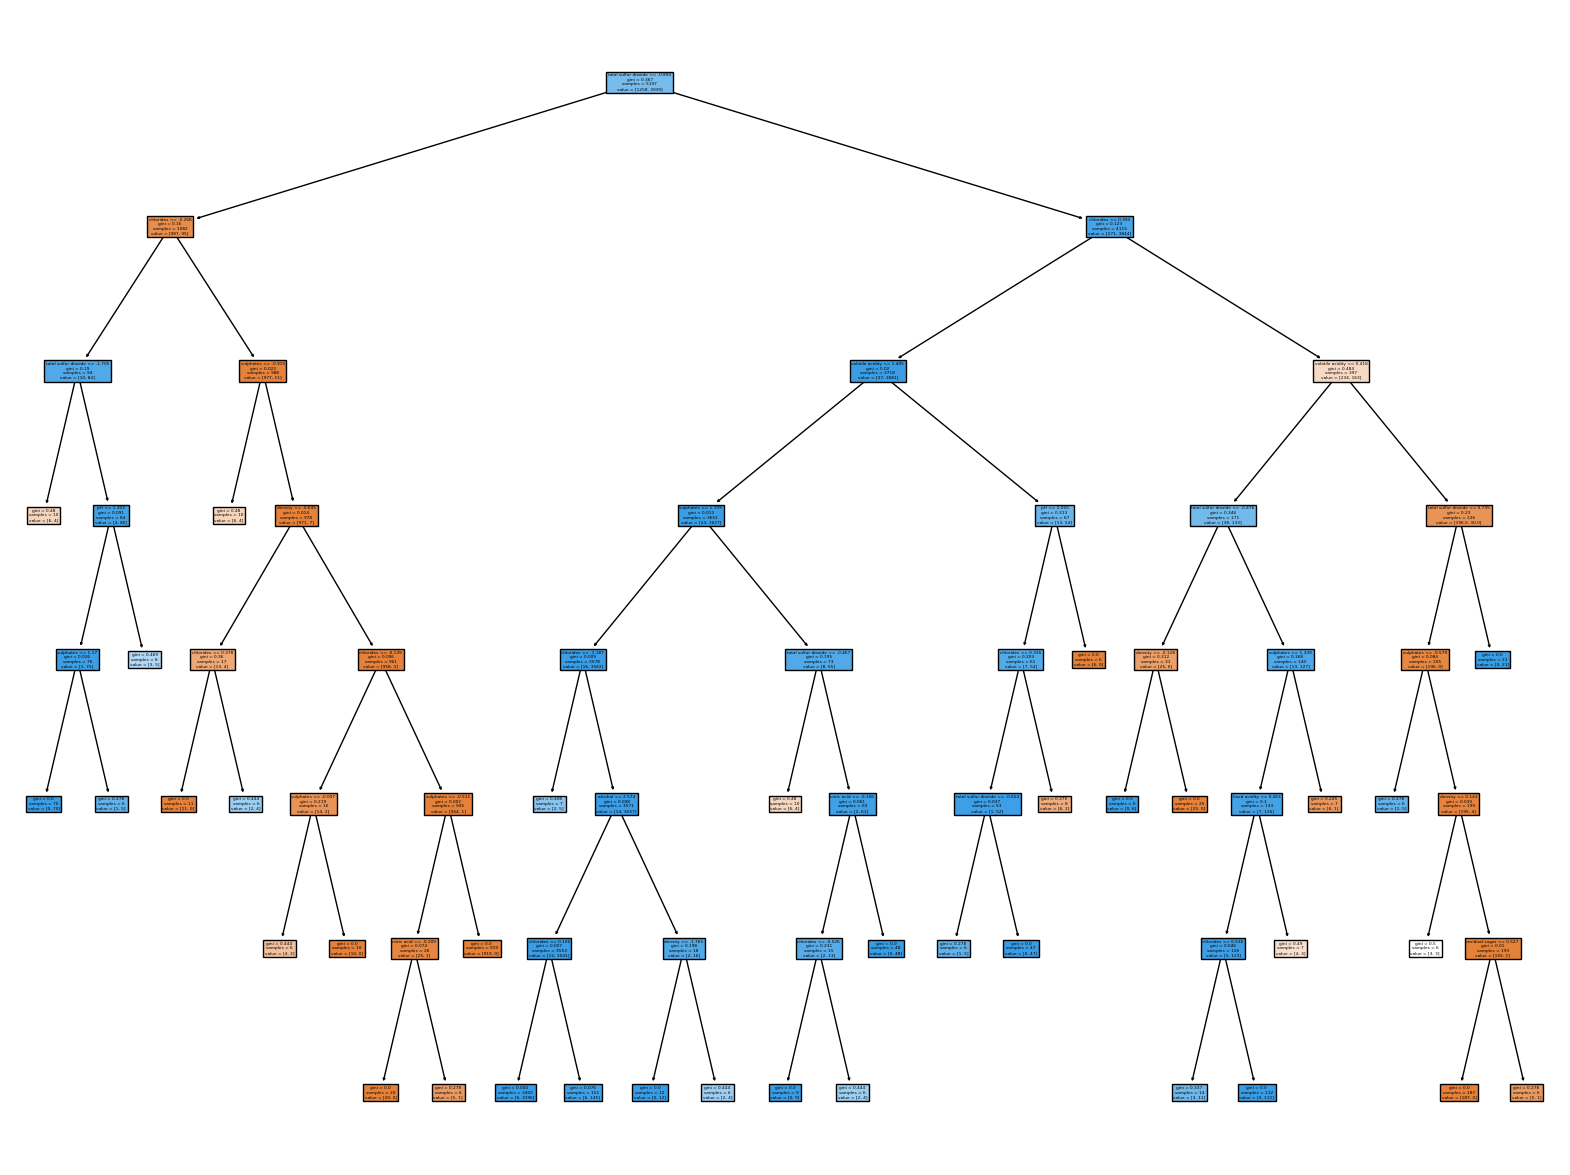

In [22]:
plt.figure(figsize=(20,15))
plot_tree(final_dt, filled=True, feature_names = X.columns)
plt.show()